# 50_Startups_data analysis

We are predicting Profit and Applying Linear Regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import confusion_matrix

In [2]:
data=pd.read_csv("C://Simple Linear Regression  - Assignments (2)//Multi Linear Regression - Assignment -2//3. Multi Linear Regression//50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
print(data.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [5]:
data.duplicated().sum()

0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
data.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [8]:
lb=LabelEncoder()
data['State']=lb.fit_transform(data['State'])

In [9]:
data.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73975.222280,121344.639600,227755.959800,1.000000,112012.639200
std,45518.223014,28017.802755,111536.337956,0.832993,40306.180338
min,334.664000,51283.140000,1903.930000,0.000000,14681.400000
25%,39936.370000,103730.875000,142431.385000,0.000000,90138.902500
50%,73051.080000,122699.795000,239452.750000,1.000000,107978.190000
75%,101602.800000,144842.180000,302423.767500,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


array([[<Axes: title={'center': 'R&D Spend'}>,
        <Axes: title={'center': 'Administration'}>],
       [<Axes: title={'center': 'Marketing Spend'}>,
        <Axes: title={'center': 'State'}>],
       [<Axes: title={'center': 'Profit'}>, <Axes: >]], dtype=object)

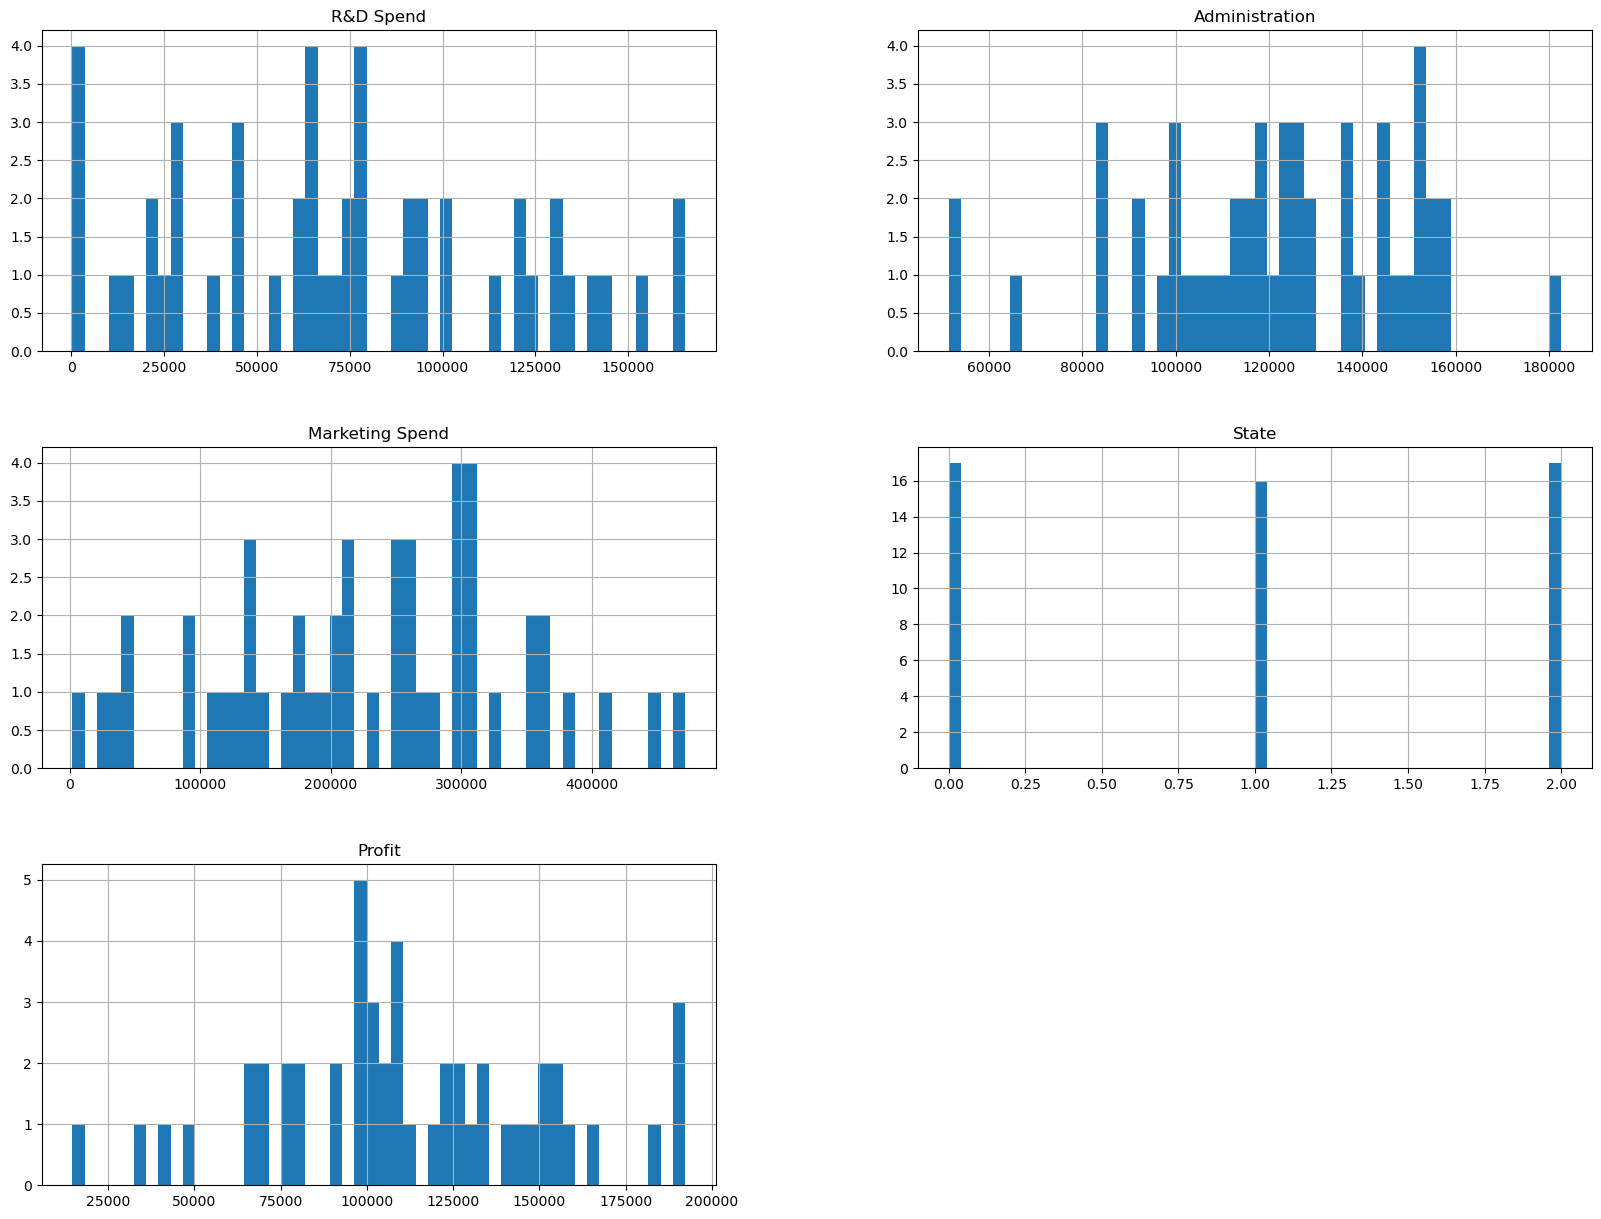

In [10]:
data.hist(bins=50,figsize=(20,15))

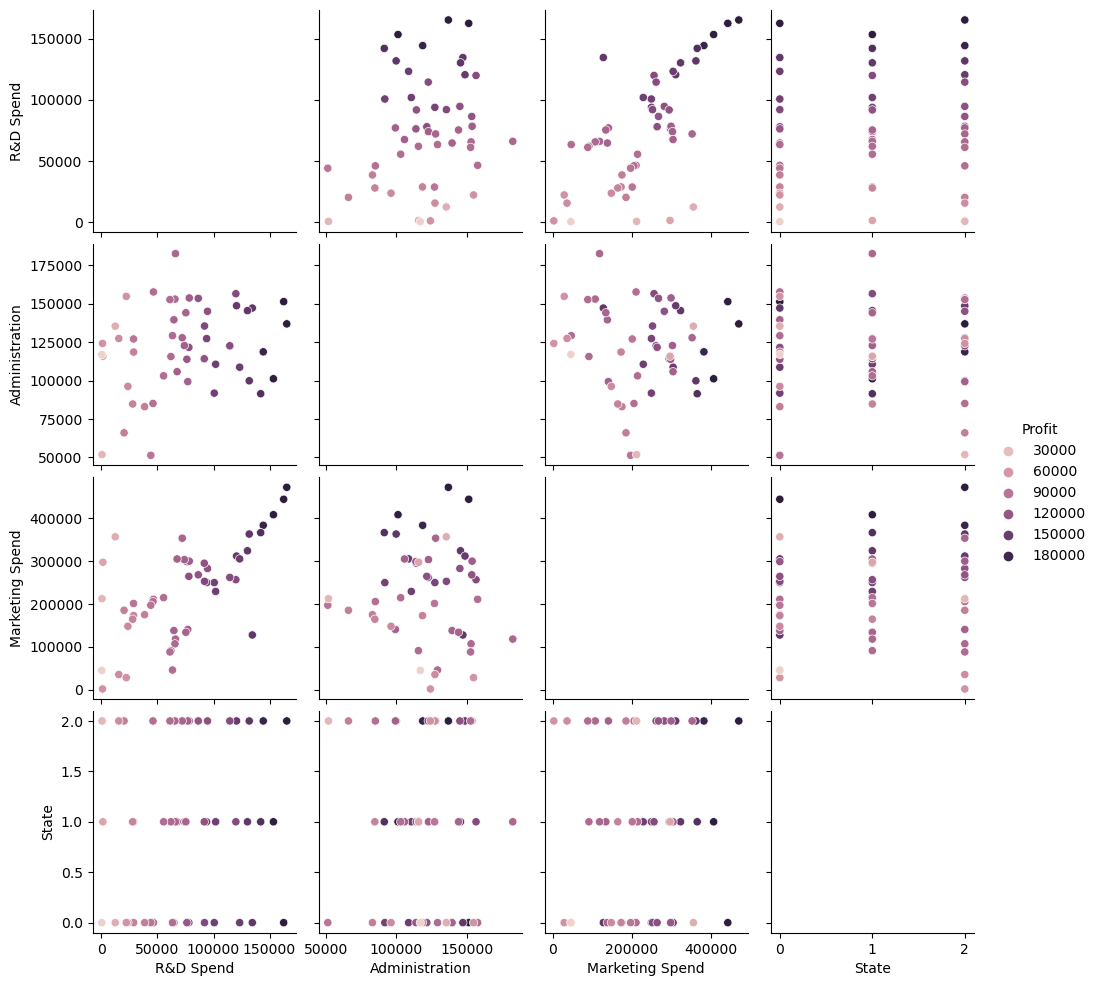

In [11]:
sns.pairplot(data,hue='Profit')

In [12]:
data['State'].value_counts()

2    17
0    17
1    16
Name: State, dtype: int64

In [13]:
data.var()

R&D Spend          2.071909e+09
Administration     7.849973e+08
Marketing Spend    1.244035e+10
State              6.938776e-01
Profit             1.624588e+09
dtype: float64

In [14]:
data.corr()['Profit']>0.4

R&D Spend           True
Administration     False
Marketing Spend     True
State              False
Profit              True
Name: Profit, dtype: bool

In [15]:
x = data[['R&D Spend','Marketing Spend',]]
y = data['Profit']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=124)

In [17]:
model = LinearRegression()
model_train = model.fit(x_train,y_train)
pred = model_train.predict(x_test)

In [18]:
print(pred)

[147650.15109797  64293.7293875   87092.53611665 166586.94305529
 113751.68955852 129348.98875959  71981.20352964 105304.86922919
 101473.72391315 173276.73979395]


In [19]:
round(r2_score(y_test,pred)*100,2)

88.89

In [20]:
mean_squared_error(y_test,pred)

117914193.68517716